In [3]:
import numpy as np
import pandas as pd
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [4]:
churn_data=pd.read_csv('E:\mlmodel deploy\CHURNPREDICTION\churndata.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\2624660858.py:1: SyntaxWarning: invalid escape sequence '\m'
  churn_data=pd.read_csv('E:\mlmodel deploy\CHURNPREDICTION\churndata.csv')


In [5]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.set_option("display.max_columns",None)

In [8]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
churn_data.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [11]:
churn_data=churn_data.drop(columns='customerID')

In [12]:
numerical_features=['MonthlyCharges','TotalCharges','tenure']

for col in churn_data.columns:
    if col not in numerical_features:
        print(col,churn_data[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [13]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
##churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'],errors='coerce')

In [15]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'].replace(' ', np.nan), errors='coerce')
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['MonthlyCharges'] * churn_data['tenure'])
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median())


In [16]:
# churn_data['TotalCharges']=churn_data['TotalCharges'].replace(' ','0')
# churn_data['TotalCharges']=churn_data['TotalCharges'].astype('float')
# len(churn_data[churn_data['TotalCharges']==''])

In [17]:
len(churn_data[churn_data['TotalCharges']==''])

0

In [18]:
churn_data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(6531,))

In [19]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
print(churn_data['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


EDA [EXPLORATORY DATA ANALYSIS]

In [21]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
churn_data.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [24]:
def plot_histograph(df,column_name):
    plt.Figure(figsize=(5,5))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"distribution of {column_name}")

    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    plt.axvline(col_mean, color='red',label='mean')
    plt.axvline(col_median, color='blue',label='median')

    plt.legend()

    plt.show()

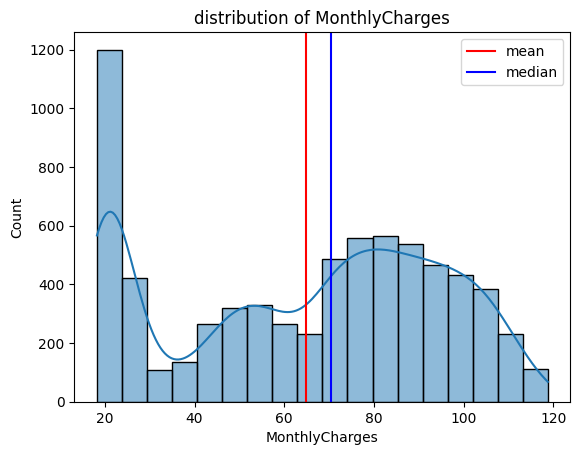

In [25]:
plot_histograph(churn_data , 'MonthlyCharges')

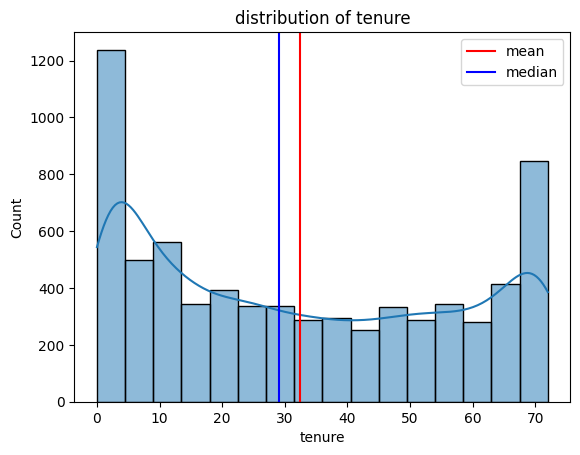

In [26]:
plot_histograph(churn_data , 'tenure')

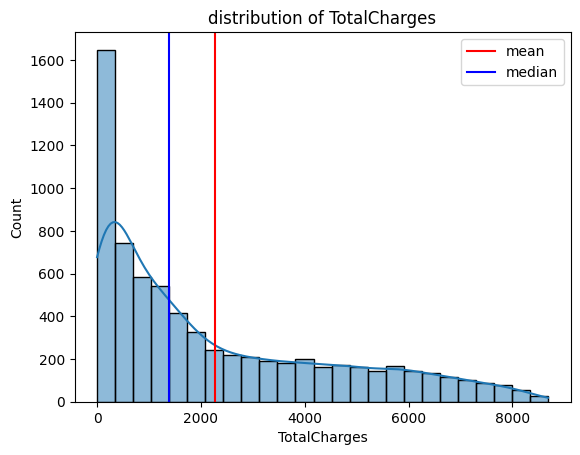

In [27]:
plot_histograph(churn_data , 'TotalCharges')


In [28]:
def box_plot(df,column_name):
    plt.figure(figsize=(5,5))
    sns.boxenplot(y=df[column_name])
    plt.title(f"box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show

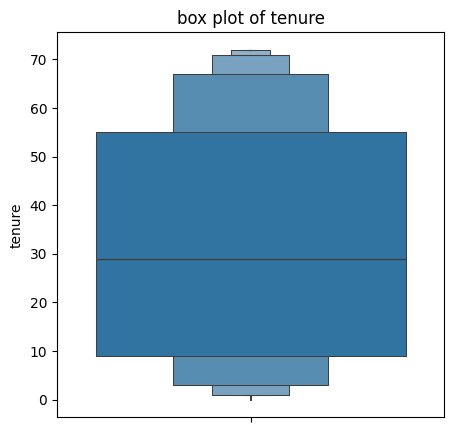

In [29]:
box_plot(churn_data,'tenure')

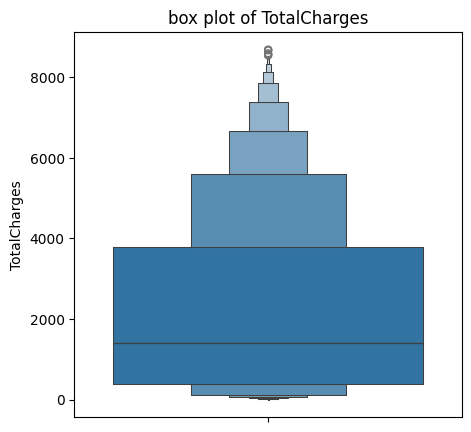

In [30]:
box_plot(churn_data,'TotalCharges')

<Axes: ylabel='MonthlyCharges'>

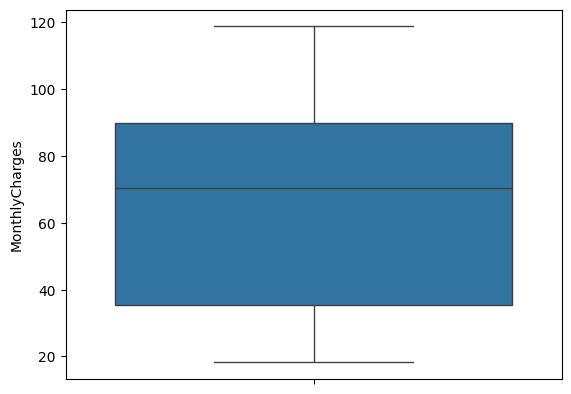

In [31]:
sns.boxplot(churn_data['MonthlyCharges'])

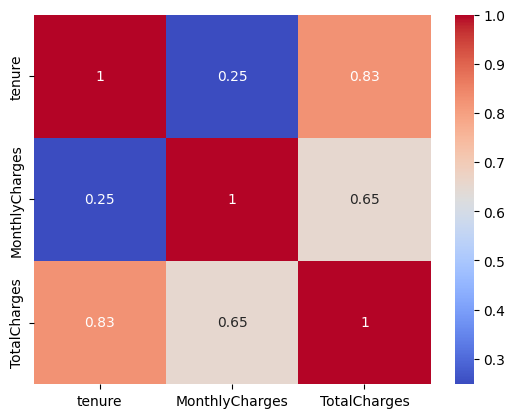

In [32]:
sns.heatmap(churn_data[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm')
plt.show()

In [33]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
object_columns=churn_data.select_dtypes(include='object').columns.to_list()
object_columns=['SeniorCitizen'] + object_columns

In [35]:
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [36]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [37]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


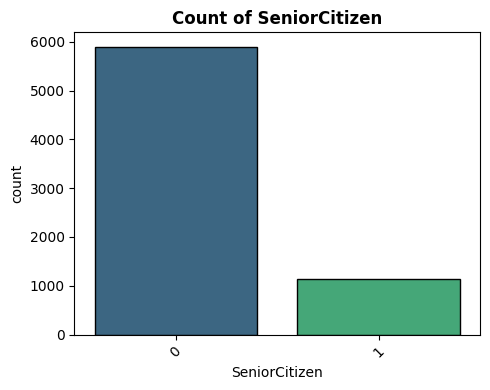

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


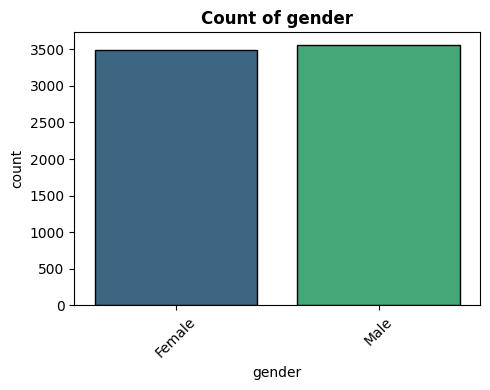

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


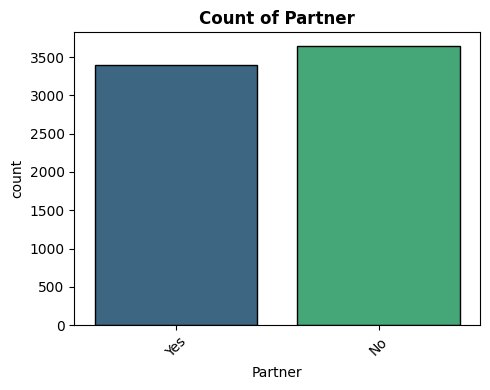

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


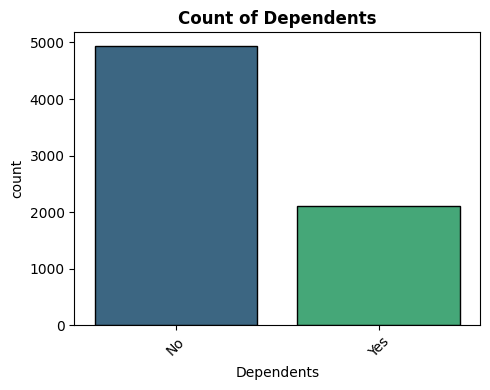

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


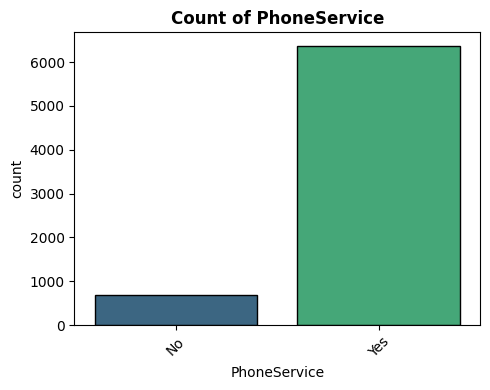

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


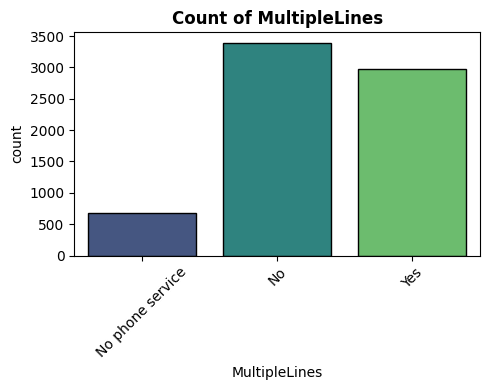

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


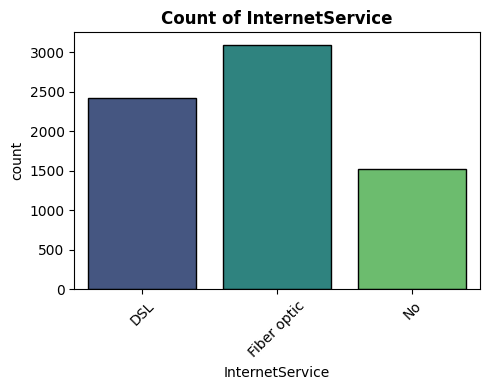

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


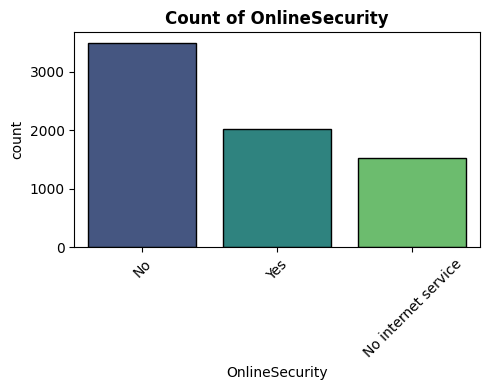

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


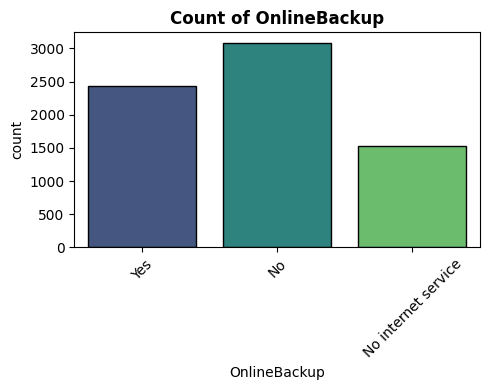

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


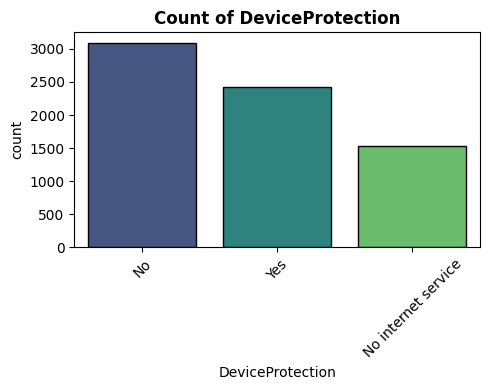

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


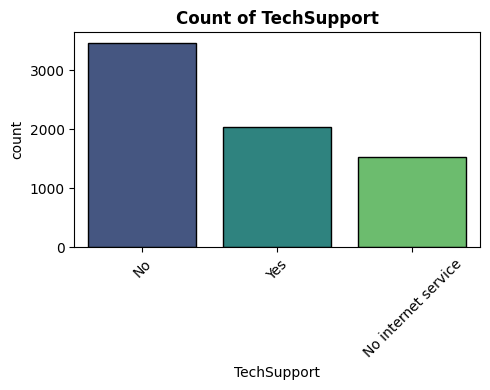

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


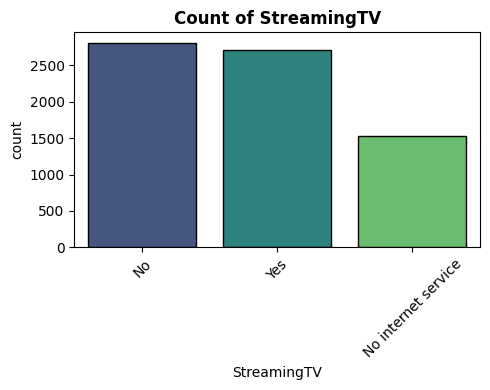

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


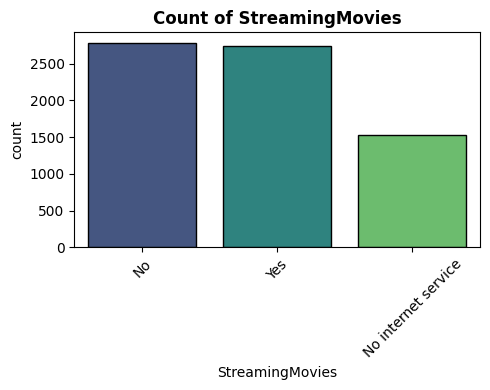

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


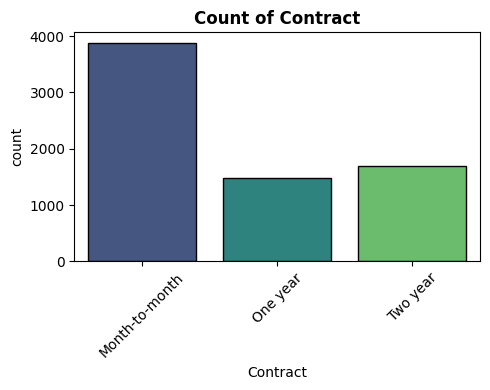

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


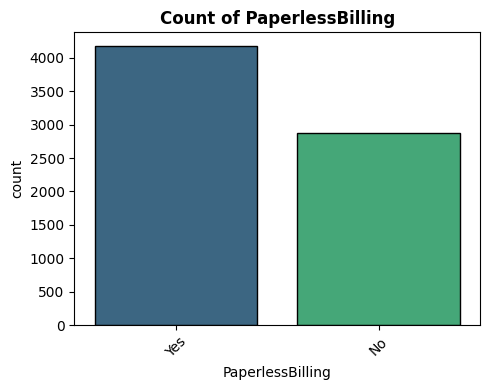

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


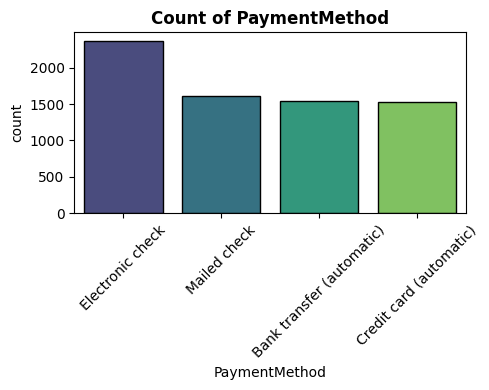

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1808754313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")


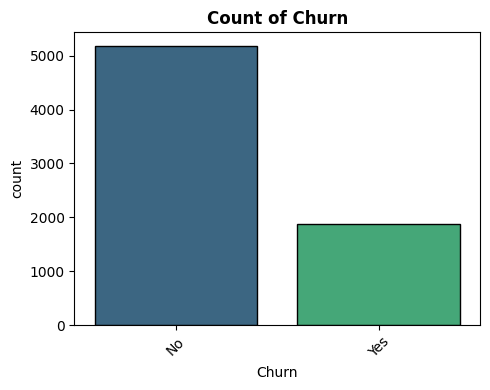

In [39]:
for col in object_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, data=churn_data, palette="viridis", edgecolor="black")
    plt.title(f"Count of {col}", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

In [40]:
churn_data.shape

(7043, 20)

In [41]:
churn_data['Churn']=churn_data['Churn'].replace({'Yes':1,'No':0}) 

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\1641583621.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_data['Churn']=churn_data['Churn'].replace({'Yes':1,'No':0})


In [42]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [43]:
for cols in churn_data:
    print(cols ,churn_data[cols].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.

In [44]:
churn_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ordinal_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
churn_data['Contract_ord'] = churn_data['Contract'].map(ordinal_map)



In [47]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [
    'gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
    'PaymentMethod'
]

In [48]:

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('ord', 'passthrough', ['Contract_ord'])
])

In [49]:
y=churn_data['Churn']

In [50]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [51]:
x=churn_data.drop(columns=['Churn'])

In [52]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract_ord
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [54]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract_ord
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
3151,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
4860,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,2
3867,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,2
3810,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.70,2
6227,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,0
4673,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.20,0
2710,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.80,1


In [55]:
y_train

3738    0
3151    0
4860    0
3867    0
3810    0
       ..
6303    0
6227    1
4673    1
2710    0
5639    0
Name: Churn, Length: 5634, dtype: int64

In [56]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

SMOTE[synthetic minroing oversamling techniques]

In [57]:
from imblearn.over_sampling import SMOTENC
cat_indices = [x_train.columns.get_loc(c) for c in categorical_features + ['Contract_ord']]
smote = SMOTENC(categorical_features=cat_indices, random_state=42)


In [58]:
cat_indices

[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19]

In [59]:
churn_data.shape

(7043, 21)

In [60]:

models={'decision tree':DecisionTreeClassifier(random_state=42),
        'random forest':RandomForestClassifier(random_state=42),
        'xgboost':XGBClassifier(random_state=42)}

In [61]:
cv_scores = {}

In [62]:
from imblearn.pipeline import Pipeline as ImbPipeline

for model_name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('clf', model)
    ])
    scores = cross_val_score(pipe, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    cv_scores[model_name] = np.mean(scores)
    print(f"{model_name} - Mean ROC-AUC: {np.mean(scores):.4f}")

decision tree - Mean ROC-AUC: 0.6708
random forest - Mean ROC-AUC: 0.8217
xgboost - Mean ROC-AUC: 0.8249


In [63]:
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
print(f"\n Best baseline model: {best_model_name}")


 Best baseline model: xgboost


In [64]:
if best_model_name == 'random forest':
    param_dist = {
        'clf__n_estimators': [100, 200, 400],
        'clf__max_depth': [6, 10, 20, None],
        'clf__min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'decision tree':
    param_dist = {
        'clf__max_depth': [5, 10, 20, None],
        'clf__min_samples_leaf': [1, 2, 4]
    }
else:  # xgboost
    param_dist = {
        'clf__n_estimators': [100, 200, 400],
        'clf__max_depth': [3, 6, 10],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__subsample': [0.8, 1.0]
    }


In [65]:
pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('clf', best_model)
])

search = RandomizedSearchCV(pipe, param_distributions=param_dist,
                            n_iter=10, scoring='roc_auc', cv=5,
                            n_jobs=-1, random_state=42, verbose=2)
search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'clf__learning_rate': [0.01, 0.05, ...], 'clf__max_depth': [3, 6, ...], 'clf__n_estimators': [100, 200, ...], 'clf__subsample': [0.8, 1.0]}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [66]:
cv_scores

{'decision tree': np.float64(0.6708319816324584),
 'random forest': np.float64(0.8216682260923409),
 'xgboost': np.float64(0.8249458787272828)}

In [67]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

y_pred = search.predict(x_test)
y_proba = search.predict_proba(x_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC :", average_precision_score(y_test, y_proba))


=== Classification Report ===
              precision    recall  f1-score   support

           0      0.885     0.782     0.830      1035
           1      0.543     0.719     0.619       374

    accuracy                          0.765      1409
   macro avg      0.714     0.750     0.725      1409
weighted avg      0.794     0.765     0.774      1409

ROC-AUC: 0.8419695678007698
PR-AUC : 0.6549288492589526


e:\mlmodel deploy\CHURNPREDICTION\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 201it [00:14, 13.73it/s]                         
C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\327565577.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, show=False)


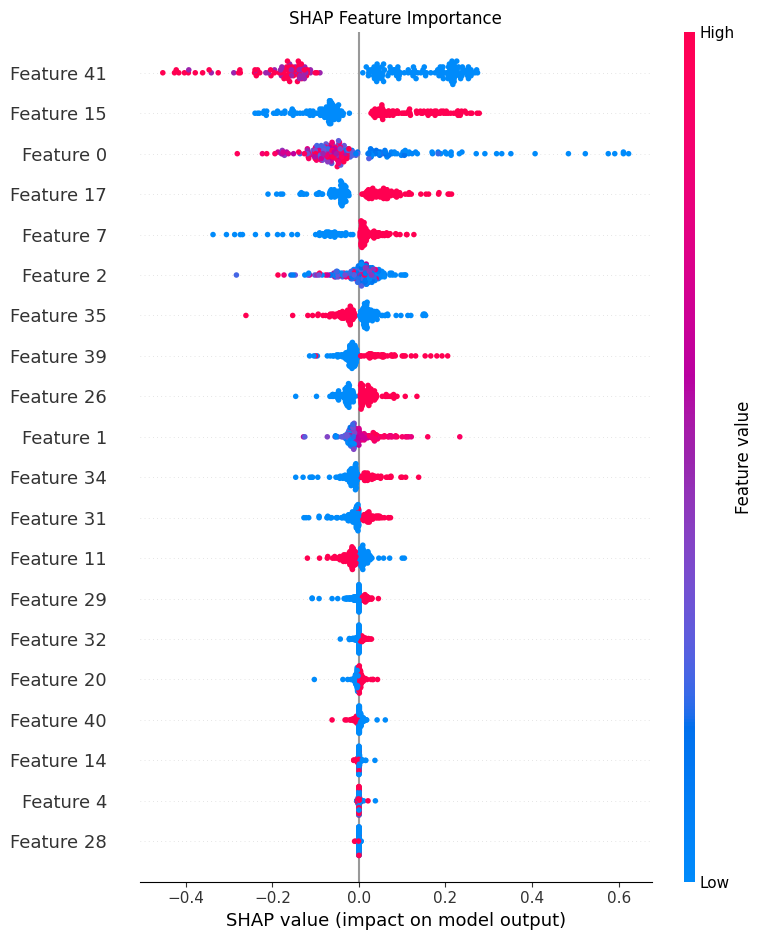

C:\Users\dinesh\AppData\Local\Temp\ipykernel_9648\327565577.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, max_display=10, show=False)


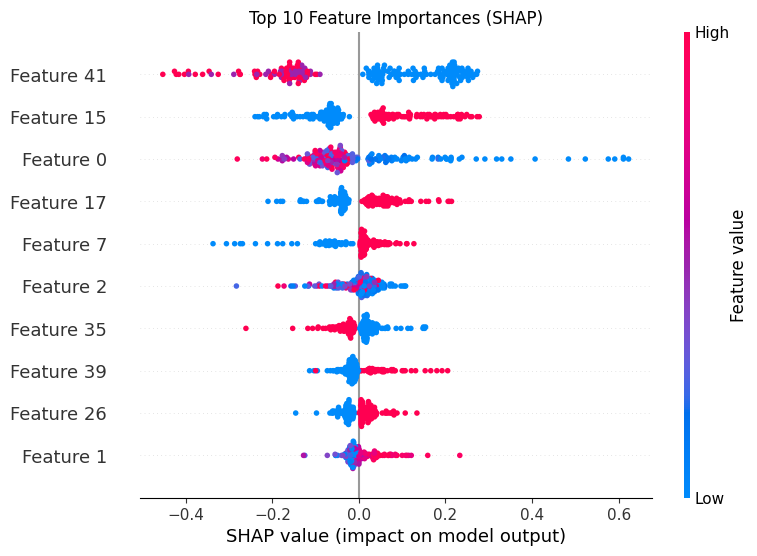

In [68]:
import shap, matplotlib.pyplot as plt


best_pipe = search.best_estimator_
final_model = best_pipe.named_steps['clf']
X_trans = best_pipe.named_steps['preprocessor'].transform(x_test)

explainer = shap.Explainer(final_model.predict, X_trans)
shap_values = explainer(X_trans[:200])

plt.title("SHAP Feature Importance")
shap.summary_plot(shap_values, show=False)
plt.show()

shap.summary_plot(shap_values, max_display=10, show=False)
plt.title("Top 10 Feature Importances (SHAP)")
plt.show()



🔹 Best Threshold (by F1): 0.522
Precision: 0.564 | Recall: 0.717 | F1: 0.631


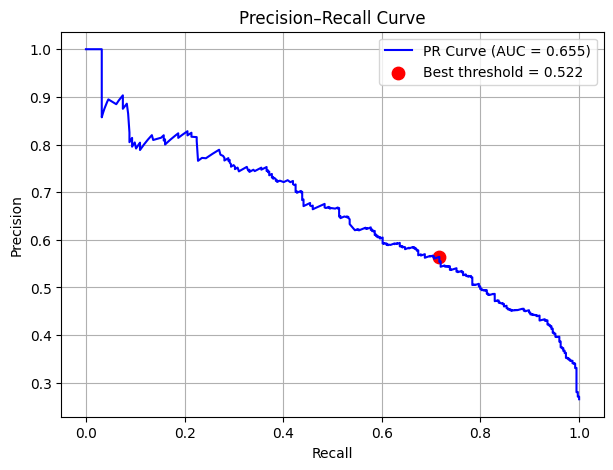

In [69]:
from sklearn.metrics import precision_recall_curve, auc

# Get precision, recall, and thresholds from your model
prec, rec, thr = precision_recall_curve(y_test, y_proba)

# Compute the F1-score for each threshold
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)

# Find the threshold that gives the best F1
best_idx = np.argmax(f1_scores)
best_threshold = thr[best_idx]

print(f"\n🔹 Best Threshold (by F1): {best_threshold:.3f}")
print(f"Precision: {prec[best_idx]:.3f} | Recall: {rec[best_idx]:.3f} | F1: {f1_scores[best_idx]:.3f}")

# Plot Precision–Recall curve
plt.figure(figsize=(7,5))
plt.plot(rec, prec, color="blue", label=f"PR Curve (AUC = {auc(rec, prec):.3f})")
plt.scatter(rec[best_idx], prec[best_idx], color="red", s=80, label=f"Best threshold = {best_threshold:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()



=== Classification Report (Optimal Threshold) ===
              precision    recall  f1-score   support

           0      0.887     0.800     0.841      1035
           1      0.564     0.717     0.631       374

    accuracy                          0.778      1409
   macro avg      0.725     0.758     0.736      1409
weighted avg      0.801     0.778     0.785      1409

ROC-AUC: 0.8419695678007698
PR-AUC : 0.6549288492589526


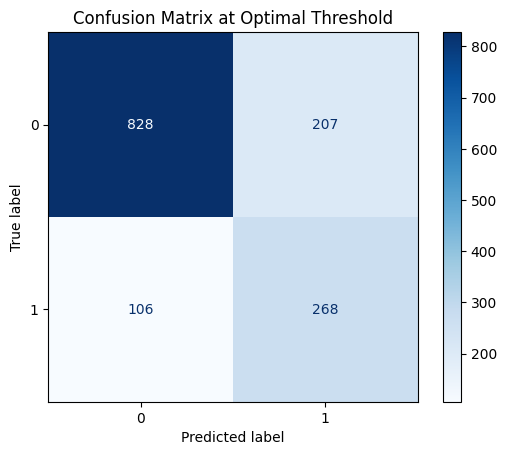

In [70]:
# Apply new threshold to probabilities
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# Re-evaluate metrics
print("\n=== Classification Report (Optimal Threshold) ===")
print(classification_report(y_test, y_pred_optimal, digits=3))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC :", average_precision_score(y_test, y_proba))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimal, cmap='Blues', values_format='d')
plt.title("Confusion Matrix at Optimal Threshold")
plt.show()


PICKEL MODEL


In [71]:
import pickle

In [72]:
import pickle

with open("churn_prediction_model.pkl", "wb") as f:
    pickle.dump(search.best_estimator_, f)

with open("churn_prediction_model.pkl", "rb") as f:
    model = pickle.load(f)


In [73]:
ordinal_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'Contract_ord': ordinal_map['Month-to-month'],   # 👈 ADD THIS LINE
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.3,
    'TotalCharges': 900.5
}])



In [74]:
# Create the ordinal mapping again
ordinal_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

# Add the column (your model expects this)
new_customer['Contract_ord'] = new_customer['Contract'].map(ordinal_map)


In [75]:
prediction=model.predict(new_customer)[0]


In [76]:
probability=model.predict_proba(new_customer)[0][1]


In [77]:

print("Prediction:", "Yes" if prediction == 1 else "No")
print("Probability:", round(probability, 3))


Prediction: Yes
Probability: 0.783
